<a href="https://colab.research.google.com/github/msof07/msof07/blob/main/Clasificaci%C3%B3n_de_calificaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RETO DE APRENDIZAJE 2 - Redes Neuronales

**Objetivo: Desarrolla un algoritmo de regresión logística para clasificar las notas de un grupo de estudiantes**

De acuerdo con el dataset, cada registro tiene 2 calificaciones y una observación final que lo clasifica en 1 o 0 de acuerdo a esas notas (parámetros). Con el uso de sklearn se ajustó el modelo de acuerdo con los parámetros y la observación final o target (0 o 1). Al final se observó el rate de respuestas calculadas correctamente con la ayuda de una matriz de confusión.

## Librerías

In [55]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [70]:
drive.mount("/content/gdrive")
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Diplomado/Diplomado Datasets/grades_trans.csv',header=0)
data.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,param1,param2,clasif
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Exploración de la data

In [28]:
# Ver la proporción de 0s y 1s
data["clasif"].value_counts()

1    60
0    40
Name: clasif, dtype: int64

In [62]:
# Voy a categorizar las calificaciones en bins, para eso quiero ver el rango en que fluctúan ambas calificaciones

data.min( )
#data.max()

param1    30.058822
param2    30.603263
clasif     0.000000
dtype: float64

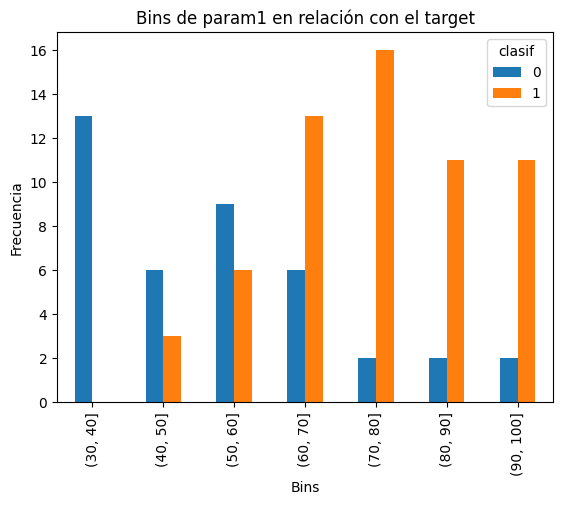

In [75]:
# Categorización de las calificaciones en rangos de 10 en 10 para parámetro 1 y 2

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
data['binned1'] = pd.cut(data["param1"], bins)

pd.crosstab(data.binned1,data.clasif).plot(kind='bar')
plt.title("Bins de param1 en relación con el target")
plt.xlabel("Bins")
plt.ylabel("Frecuencia")
plt.show()

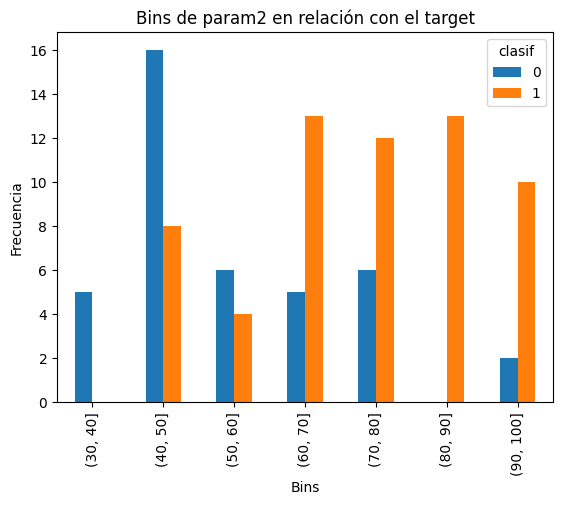

In [76]:
data['binned2'] = pd.cut(data["param2"], bins)

pd.crosstab(data.binned2,data.clasif).plot(kind='bar')
plt.title("Bins de param2 en relación con el target")
plt.xlabel("Bins")
plt.ylabel("Frecuencia")
plt.show()

## AJUSTE DE MODELO

In [57]:
params = data[["param1","param2"]]

In [58]:
target = data[["clasif"]]

In [43]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(params,target)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0, solver='liblinear')

In [47]:
# model.predict_proba(params)
model.predict(params)

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [48]:
# Ratio de predicciones correctas
model.score(params,target)

0.87

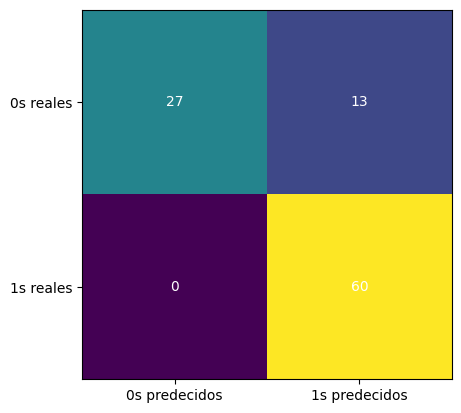

In [54]:
matrix = confusion_matrix(target,model.predict(params))

fig, ax = plt.subplots()
ax.imshow(matrix)
ax.xaxis.set(ticks=(0, 1), ticklabels=('0s predecidos', '1s predecidos'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('0s reales', '1s reales'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='white')

plt.show()


# 87 valores predecidos correctamente
# 13 valores predecidos incorrectamente

**87 valores predecidos correctamente**,
**13 valores predecidos incorrectamente**

## Conclusión

En este ejercicio me salté el proceso de "data splitting" que intentaré elaborar en el siguiente ejercicio conforme tengamos más datos. Me sorprendió un poco que me tardé más en tener los datos "limpios" en el sentido del formato. Cuando importaba el archivo los tabs como delimitador no me dejaban separar los datos en columnas entonces tuve que recurrir a manipular un poco los datos previamente en excel con la fórmula "LIMPIAR". Aunque no eran muchos datos y aunque desconocía el contexto de los datos, traté de indagar alguna relación con el target.